In [59]:
import pandas as pd
import os
path = os.getcwd()

In [60]:
path = "~/Desktop"

In [61]:
train = pd.read_csv(path+"/quora-data/quora-question-pairs/train.csv")
test = pd.read_csv(path+"/quora-data/quora-question-pairs/test.csv")
sample = pd.read_csv(path+"/quora-data/quora-question-pairs/sample_submission.csv")

In [62]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [63]:
train[train.is_duplicate == 1].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [64]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [65]:
print "-------Train Data---------","\n", train.info(),"\n","\n","-------Test Data---------","\n",test.info()

-------Train Data--------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
None 

-------Test Data--------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB
None


In [66]:
import numpy as np
print test.isnull().sum()
pd.isnull(test).any(1).nonzero()[0]

test_id      0
question1    2
question2    4
dtype: int64


/Users/selenacordona/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 379205,  817520,  943911, 1046690, 1270024, 1461432])

In [67]:
# removing null data from our test set.
test[test.index.isin([ 379205,  817520,  943911, 1046690, 1270024, 1461432])]

,test_id,question1,question2
379205,379205,How I can learn android app development?,NaN
817520,817520,How real can learn android app development?,NaN
943911,943911,How app development?,NaN
1046690,1046690,NaN,How I what can learn android app development?
1270024,1270024,How I can learn app development?,NaN
1461432,1461432,NaN,How distinct can learn android app development?


In [68]:
test = test[~test.index.isin([379205,  817520,  943911, 1046690, 1270024, 1461432])]

In [69]:
import numpy as np
print train.isnull().sum()
pd.isnull(train).any(1).nonzero()[0]

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


/Users/selenacordona/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([105780, 201841, 363362])

In [70]:
# removing null data from our training set.
train[train.index.isin([105780, 201841, 363362])]



,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [71]:
train = train[~train.index.isin([105780, 201841, 363362])]

### Histogram of duplicates to non-duplicates 

In [72]:
%matplotlib inline

import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

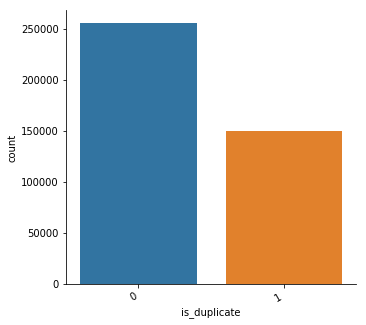

In [73]:
ax = sns.catplot(x='is_duplicate',kind='count',data=train,orient="h")
ax.fig.autofmt_xdate()

In [74]:
total_dupes = train[train.is_duplicate == 1].shape[0]
total_nondupes = train[train.is_duplicate == 0].shape[0]
print "Percentage of duplicates in all data: ", str(round((float(total_dupes)/float(train.shape[0])*100),2))+"%"
print "Percentage of non-duplicates in all data: ", str(round((float(total_nondupes)/float(train.shape[0])*100),2))+"%"


Percentage of duplicates in all data:  36.92%
Percentage of non-duplicates in all data:  63.08%


The dataset is high imbalanced, with only 36.92% of questions being classified as duplicate. Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

### Classifying on Logistic Regression Model 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train.iloc[:,0:3]
y = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)


# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    82456
1    18616
Name: 0, dtype: int64

In [76]:
from sklearn.metrics import f1_score, recall_score
# accuracy isn't that telling, trying f1-score and recall score to provide more insight to how our model did
# F1-Score: the weighted average of precision and recall.
# Precision: the number of true positives divided by all positive predictions. 
# Recall: the number of true positives divided by the number of positive values in the test data. 
# Recall is also called Sensitivity or the True Positive Rate
print "accuracy score:", accuracy_score(y_test, lr_pred)
print "recall:", recall_score(y_test, lr_pred)
print "f1-score:", f1_score(y_test, lr_pred)

accuracy score: 0.7236425518442299
recall: 0.374400043142965
f1-score: 0.4985458331837277


While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

### Classifying on Random Forest Classifier 

In [77]:
from sklearn.ensemble import RandomForestClassifier

# train rfc model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on the test set
rfc_pred = rfc.predict(X_test)

print "accuracy score:", accuracy_score(y_test,rfc_pred)
print "f1-score:", f1_score(y_test,rfc_pred)
print "recall-score:", recall_score(y_test, rfc_pred)

accuracy score: 0.6760823967072978
f1-score: 0.5349507805508602
recall-score: 0.5077387693469234


Slightly lower accuracy score in favor of a higher f1-score and recall-score.

Attempting a different technique to resample the data with a module from scikit-learn to randomly replicate samples from the minority class.

In [78]:
predictions.head()

,0
0,0
1,0
2,0
3,0
4,0


### Feature Engineering

In [79]:
# might be worthwhile to check out featexp library

In [80]:
duplicates = train[train.is_duplicate == 1]

Gathering sentiment/qualitative features

In [58]:
import textblob as t
df = pd.DataFrame()
df['polarity_q1'] = duplicates[u'question1'].map(lambda text: t.TextBlob(text.decode('utf-8')).sentiment.polarity)
df['subjectivity_q1'] = duplicates[u'question1'].map(lambda text: t.TextBlob(text.decode('utf-8')).sentiment.subjectivity)
df['review_len_q1'] = duplicates[u'question1'].astype(str).apply(len)
df['word_count_q1'] = duplicates[u'question1'].apply(lambda x: len(str(x).split()))
df['polarity_q2'] = duplicates[u'question2'].map(lambda text: t.TextBlob(text.decode('utf-8')).sentiment.polarity)
df['subjectivity_q2'] = duplicates[u'question2'].map(lambda text: t.TextBlob(text.decode('utf-8')).sentiment.subjectivity)
df['review_len_q2'] = duplicates[u'question2'].astype(str).apply(len)
df['word_count_q2'] = duplicates[u'question2'].apply(lambda x: len(str(x).split()))
df = pd.concat([df, duplicates[u'question1'], duplicates[u'question2'] ], axis=1)

In [81]:
df.head(10)

,polarity_q1,subjectivity_q1,review_len_q1,word_count_q1,polarity_q2,subjectivity_q2,review_len_q2,word_count_q2,question1,question2
5,0.000000,0.000000,86,16,0.000000,0.000000,90,16,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,0.700000,0.600000,30,7,0.800000,0.750000,41,9,How can I be a good geologist?,What should I do to be a great geologist?
11,0.000000,0.000000,43,9,0.000000,0.000000,38,8,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,0.433333,0.833333,36,7,0.433333,0.833333,39,8,What can make Physics easy to learn?,How can you make physics easy to learn?
13,0.375000,0.583333,43,7,0.375000,0.583333,38,6,What was your first sexual experience like?,What was your first sexual experience?
15,-0.104167,0.362500,95,15,0.000000,0.000000,91,17,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...
16,-0.312500,0.687500,28,4,0.000000,0.000000,29,4,What does manipulation mean?,What does manipulation means?
18,0.350000,0.500000,82,14,0.433333,0.833333,73,13,Why are so many Quora users posting questions ...,Why do people ask Quora questions which can be...
20,0.000000,0.000000,26,5,0.000000,0.000000,43,7,Why do rockets look white?,Why are rockets and boosters painted white?
29,0.000000,1.000000,38,8,0.050000,0.700000,69,12,How should I prepare for CA final law?,How one should know that he/she completely pre...


### Correlation Heatmap of Sentiment/Qualitative Features for Q1 + Q2

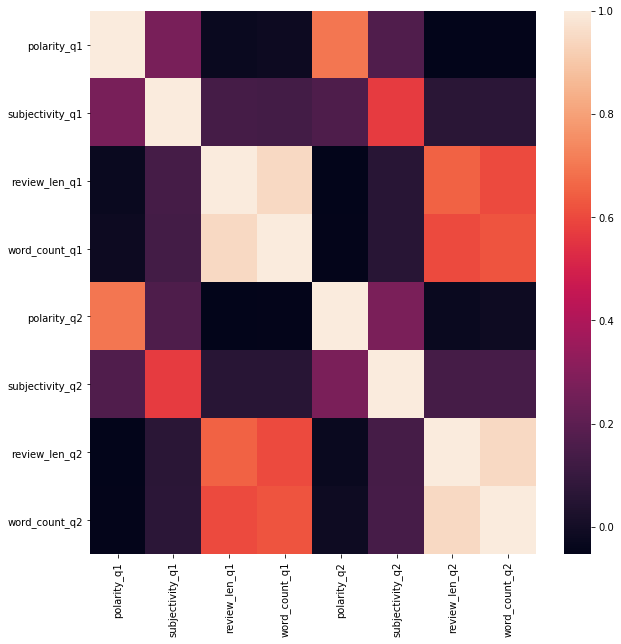

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:8].corr());